# Yalefaces Principal Component Analysis

In this mini project we apply PCA to the Yalefaces database and visualize how reconstruction quality changes as the number of principle components increases. We also calculate reconstruction loss.

In [49]:
import os
import skimage
from skimage.data import imread
from skimage.color import rgb2gray
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import matplotlib.gridspec as gridspec

def load_data(data_directory):
	flat_images = [np.array(rgb2gray(imread(data_directory+'/'+f))).flatten() \
				for f in os.listdir(data_directory) if not f.endswith('txt')]

	return np.array(flat_images)

def plot_image(flattened_image):
	plt.imshow(np.reshape(flattened_image, newshape=(243, 320)), cmap='gray')
	plt.show()    

In [85]:
# load and flatten image data
data_dir = 'yalefaces'
flat_images = load_data(data_dir)

In [81]:
# calculate mean vector
u = np.mean(flat_images, axis=0)
# centre dataset
X = flat_images - u
# compute singular values and eigenvectors
num_eigenvalues = flat_images.shape[0] - 1
U, s, VT = sla.svds(X, k=num_eigenvalues)
# reorder eigenvectors descending
VT = VT[::-1]
# compute latent variables
Z = np.dot(X, VT.T)

print('u', u.shape)
print('Z', Z.shape)
print('VT', V.T.shape)

u (77760,)
Z (166, 165)
VT (165, 77760)


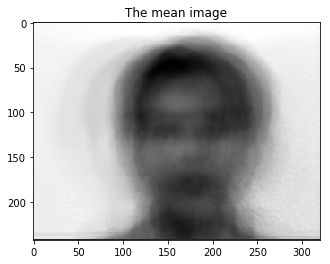

In [87]:
plt.imshow(np.reshape(u, newshape=(243, 320)), cmap='gray')
plt.title('The mean image')
plt.show()

In [82]:
# reconstruct data using different numbers of principle components
num_pcs = [5, 10, 15, 20, 30, 40, 50, 60, 160]
reconstructed_data = []
for num in num_pcs:
    X1 = np.add(np.dot(Z[:,:num], VT[:num]), u)
    reconstructed_data.append(X1)

In [83]:
# calculate sum squared error between original and reconstructed images
sses = []
for i in range(len(num_pcs)):
    sses.append(np.sum((flat_images - reconstructed_data[i])**2))

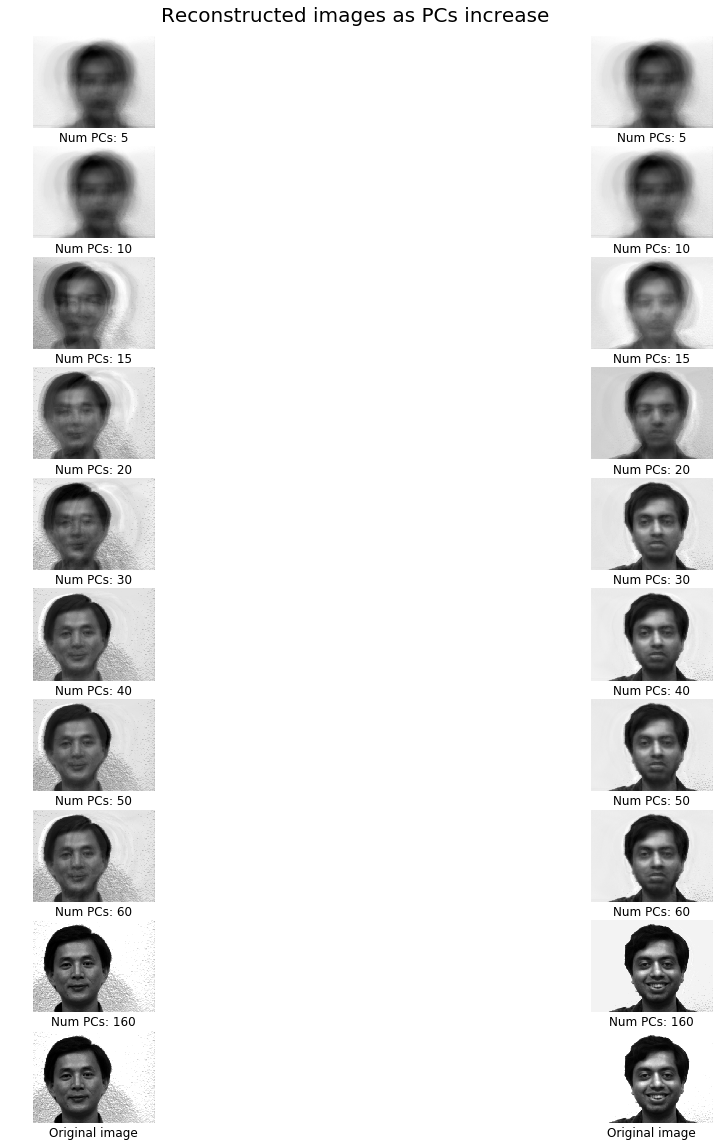

In [113]:
# plot the results
fig = plt.figure(figsize=(20,20))
gs1 = gridspec.GridSpec(len(num_pcs)+1, 2)
gs1.update(wspace=0, hspace=.2)  # set the spacing between axes.
for i in range(len(num_pcs)):
    for j in range(2):
        ax = plt.subplot(gs1[i, j])
        if j / 2 == 0:
            ax.imshow(np.reshape(reconstructed_data[i][5], newshape=(243, 320)), cmap='gray')
        else:
            ax.imshow(np.reshape(reconstructed_data[i][10], newshape=(243, 320)), cmap='gray')
        ax.axis('off')
        text =  "Num PCs: " + str(num_pcs[i])
        ax.text(0.5,-0.15, text, size=12, ha="center", transform=ax.transAxes)

ax = plt.subplot(gs1[-1, 0])
ax.imshow(np.reshape(flat_images[5], newshape=(243, 320)), cmap='gray')
ax.axis('off')
ax.text(0.5,-0.15, "Original image", size=12, ha="center", 
         transform=ax.transAxes)
ax = plt.subplot(gs1[-1, 1])
ax.imshow(np.reshape(flat_images[10], newshape=(243, 320)), cmap='gray')
ax.axis('off')
ax.text(0.5,-0.15, "Original image", size=12, ha="center", 
         transform=ax.transAxes)

fig.suptitle('Reconstructed images as PCs increase', fontsize=20, y=.9)
plt.show()

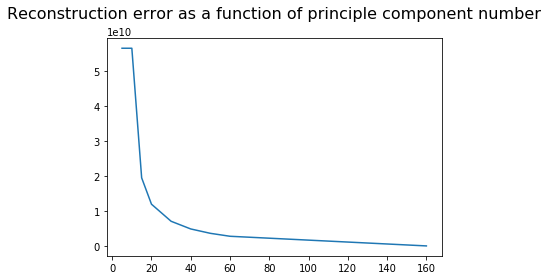

In [115]:
plt.plot(num_pcs, sses)
plt.title('Reconstruction error as a function of principle component number', pad='20',fontsize=16)
plt.show()